In [428]:
%matplotlib inline

In [429]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.affinity import affine_transform
from shapely.geometry import mapping


In [430]:
# Replace 'path/to/your_shapefile.shp' with the actual path to your shapefile

geojson_net_path = '24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-input_Tarnowo-Pom.geojson'
geojson_fie_path = '24-04-24_template_geo2scheme_geojson_FIE-input_Tarnowo-Pom.geojson'

# Siedlce OSM: '2024-01-24_siedlce_2180.geojson'
# Siedlce ELEMENTY SIECIOWE: '2024-01-24_elem-siec_isa.geojson'
# Siedlce EIK: '2024-01-31_siedlce_EIK_2180.geojson'
# Warka OSM: '2024-01-31_warka_osm_2180.geojson'
# '2024-01-31_warka_osm_2180.geojson'
#Skierniewice: '2024-02-01_skierniewice_2180_osm.geojson'

#24-04

#24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-input_Tarnowo-Pom.geojson
#24-04-24_template_geo2scheme_geojson_FIE-input_Tarnowo-Pom.geojson


In [431]:
# Read geojson files
gdf_net = gpd.read_file(geojson_net_path)

gdf_fie = gpd.read_file(geojson_fie_path)

In [432]:
# Extract non-spatial properties
non_spatial_properties = gdf_net.drop(columns='geometry')
non_spatial_properties_fie = gdf_fie.drop(columns='geometry')

<Axes: >

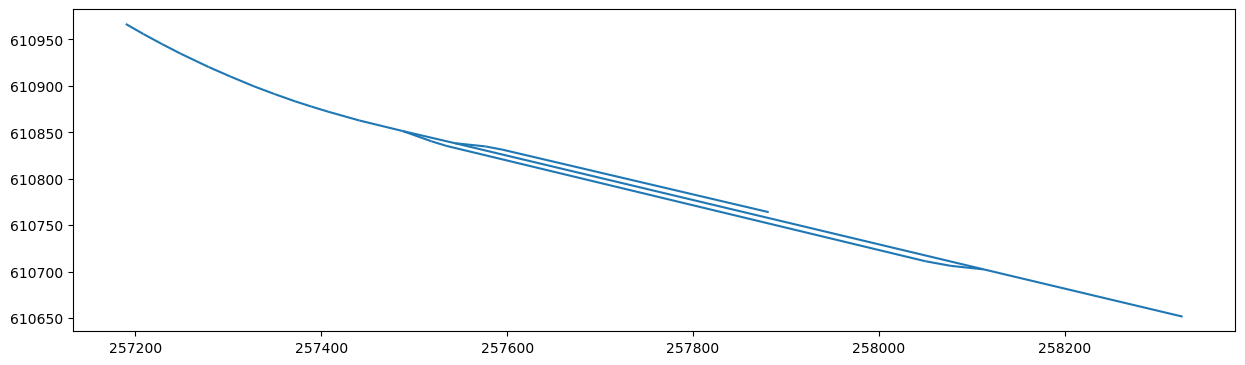

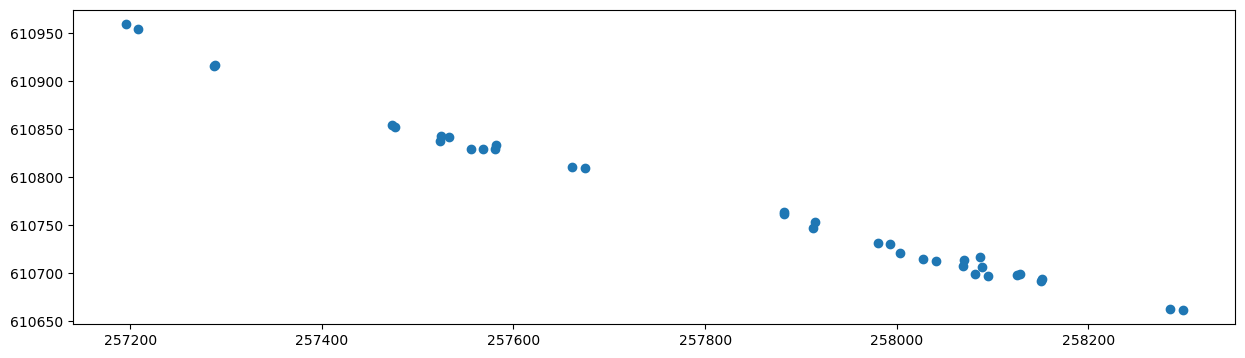

In [433]:
# Visualize the data
gdf_net.plot(figsize=(15, 15))
gdf_fie.plot(figsize=(15, 15))

In [434]:
area_azimuth= 166.5
rotate_angle = area_azimuth * -1

#Siedlce: 38
#Tarnowo Pomorskie -166.5

In [435]:
df_rotated2_net = gdf_net.rotate(rotate_angle, origin=gdf_net.unary_union.centroid)
df_rotated2_fie = gdf_fie.rotate(rotate_angle, origin=gdf_net.unary_union.centroid)

<Axes: >

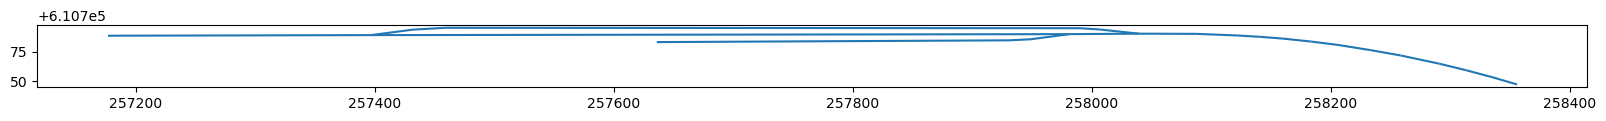

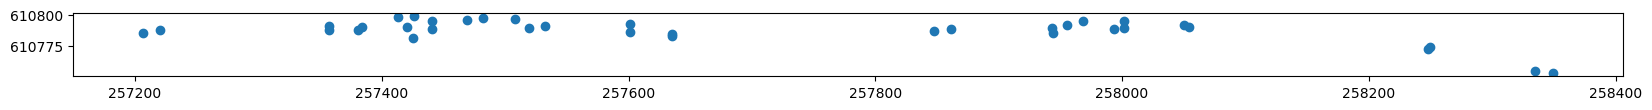

In [436]:
df_rotated2_net.plot(figsize=(20, 20))
df_rotated2_fie.plot(figsize=(20, 20))

In [437]:
# Save the GeoDataFrames as a GeoJSON files
df_rotated2_net.to_file('temp_net.geojson', driver='GeoJSON')
df_rotated2_fie.to_file('temp_fie.geojson', driver='GeoJSON')
#Paths
geojson_path2_net = 'temp_net.geojson'
geojson_path2_fie = 'temp_fie.geojson'
#Read geojson files
gdf_net = gpd.read_file(geojson_path2_net)
gdf_fie = gpd.read_file(geojson_path2_fie)

In [438]:
# Oblicz minimalne współrzędne (xmin, ymin) dla każdego z geometrii
min_coords = gdf_net.bounds.min()

In [439]:
# Przesuń wszystkie geometrie w lewo i w dół o wartości minimalnych współrzędnych
gdf_net['geometry'] = gdf_net.translate(xoff=-min_coords['minx'], yoff=-min_coords['miny'])
gdf_fie['geometry'] = gdf_fie.translate(xoff=-min_coords['minx'], yoff=-min_coords['miny'])

In [440]:
# Merge non-spatial properties back into the modified GeoDataFrame
gdf_net = gpd.GeoDataFrame(non_spatial_properties, geometry=gdf_net['geometry'])

<Axes: >

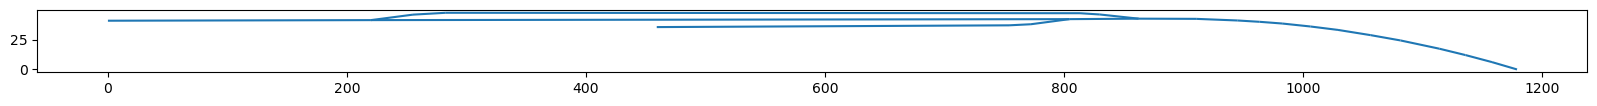

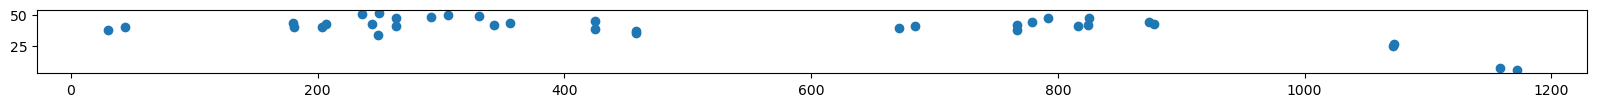

In [441]:
gdf_net.plot(figsize=(20, 20))
gdf_fie.plot(figsize=(20, 20))

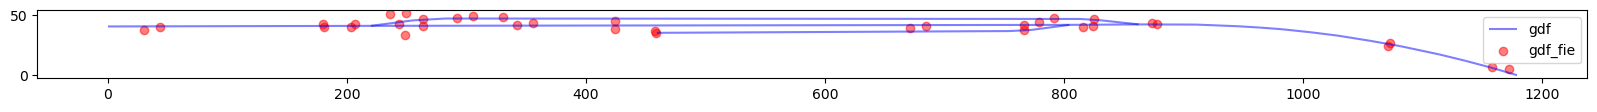

In [442]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the first GeoDataFrame on the specified axis
gdf_net.plot(ax=ax, color='blue', alpha=0.5, label='gdf')

# Plot the second GeoDataFrame on the same axis
gdf_fie.plot(ax=ax, color='red', alpha=0.5, label='gdf_fie')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [443]:
# Function to scale the x-coordinates by a factor
def scale_x(geometry, factor):
    return affine_transform(geometry, [factor, 0, 0, 1, 0, 0])

# Apply the scaling operation to the geometry column
gdf_net['geometry'] = gdf_net['geometry'].apply(scale_x, factor=1/4)
gdf_fie['geometry'] = gdf_fie['geometry'].apply(scale_x, factor=1/4)

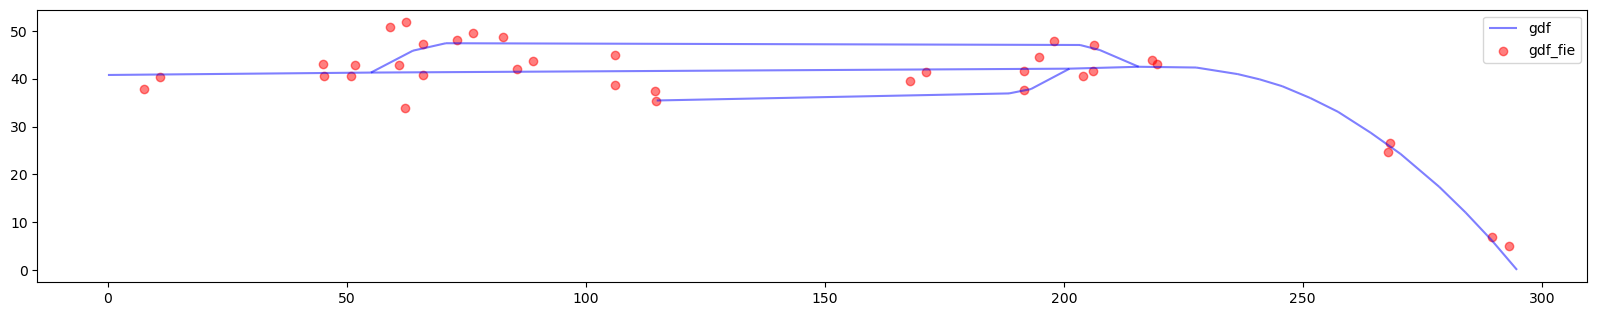

In [444]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the first GeoDataFrame on the specified axis
gdf_net.plot(ax=ax, color='blue', alpha=0.5, label='gdf')

# Plot the second GeoDataFrame on the same axis
gdf_fie.plot(ax=ax, color='red', alpha=0.5, label='gdf_fie')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [445]:
# Function to scale both x and y coordinates by a factor with origin at (0,0)
def scale_xy(geometry, factor):
    # Apply scaling transformation with origin at (0,0)
    return affine_transform(geometry, [factor, 0, 0, factor, 0, 0])

# Apply the scaling operation to the geometry column
gdf_net['geometry'] = gdf_net['geometry'].apply(scale_xy, factor=18.75)
gdf_fie['geometry'] = gdf_fie['geometry'].apply(scale_xy, factor=18.75)


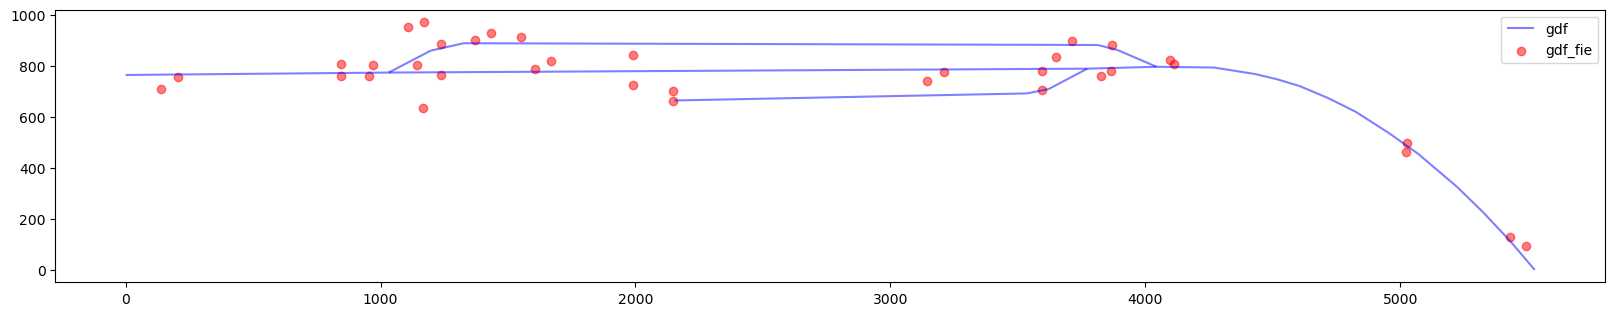

In [446]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the first GeoDataFrame on the specified axis
gdf_net.plot(ax=ax, color='blue', alpha=0.5, label='gdf')

# Plot the second GeoDataFrame on the same axis
gdf_fie.plot(ax=ax, color='red', alpha=0.5, label='gdf_fie')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [447]:
# Save the GeoDataFrame as a GeoJSON file
gdf_net.to_file('24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-output_Tarnowo-Pom.geojson', driver='GeoJSON')
gdf_fie.to_file('24-04-24_template_geo2scheme_geojson_FIE-output_Tarnowo-Pom.geojson', driver='GeoJSON')